# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

Bagging: Model paralel dengan data random (acak), mengurangi variasi

Boosting: Model berurutan dengan melatih data sebelumnya, mengurangi bias

# Import Data & Libraries

In [ ]:
# import semua libraries yang akan dibutuhkan
!pip install scikit-learn xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from random import random
from sklearn import datasets
from RandomForest import RandomForest
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

#Load Dataset Breast Cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, explained_variance_score
import warnings

In [ ]:
import kagglehub

In [ ]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()
new_data = data.copy()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
X_train_df = pd.DataFrame(X_train, columns=data.feature_names)
y_train_df = pd.DataFrame(y_train, columns=['target'])

display(X_train_df.head())
display(y_train_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


,target
0,1
1,0
2,1
3,1
4,1


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [ ]:
# gunakan RandomForestClassifier dari Sklearn
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [ ]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.random_state = random_state

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

## Predict Using Random Forest

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc =  accuracy(y_test, predictions)
print(acc)


NameError: name 'DecisionTree' is not defined

# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [ ]:
# define and train the model using GradientBoostingClassifier from Sklearn
clf = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.9649122807017544


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor): # Changed default base_learner to DecisionTreeRegressor
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm = Fm + self.lr * h_i.predict(X) # Changed variable name from fm to Fm for consistency

            # Plotting
            axs[i].plot(y, ".")
            axs[i].plot(sigmoid(Fm), ".")
            axs[i].set_title(str(i))
            axs[i].axis("off")

        plt.tight_layout()
        plt.show()
        return Fm # Changed variable name from fm to Fm

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)

## Predict Using Gradient Boosting

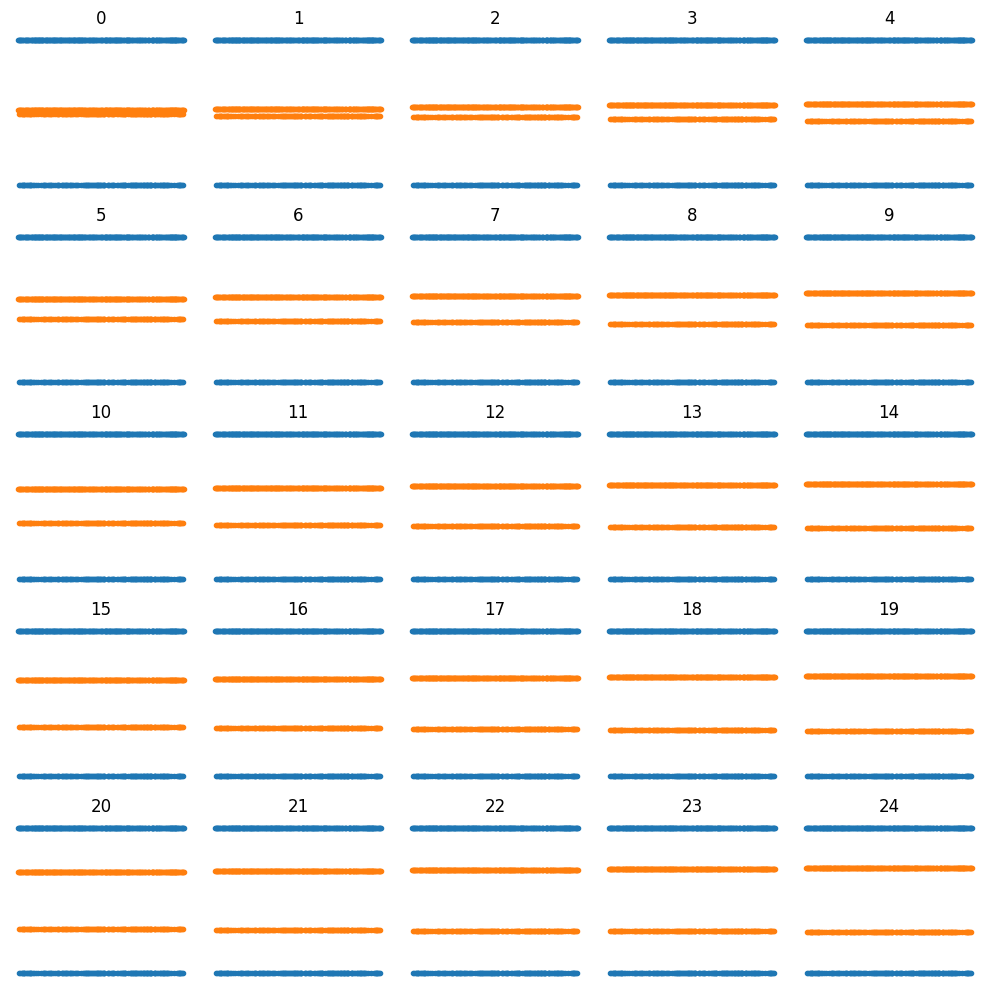

In [ ]:
# define and train the model
model = gradientBoostingClassifier()
r = model.fit(X_train, y_train)

In [ ]:
# get predictions:
preds = model.predict(X_test)

# print score menggunakan metrik accuracy
score = explained_variance_score(y_test, preds)
print("model score: ", score)

model score:  0.7759580740255487


In [ ]:
aaaaaaaaaaaaaaaa

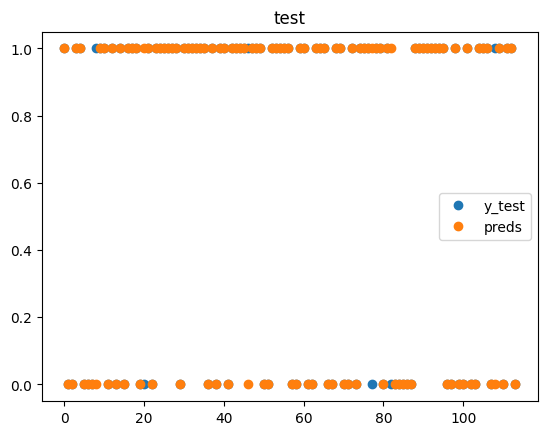

In [ ]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()